# Algorithms and Data Structures with Python - Assignment 1

University of Amsterdam / Faculty of Economics and Business

Bachelor Business Analytics Y2 2024-2025

Author: [Julien Rossi](mailto:j.rossi@uva.nl)

* This assignment is made for auto-grading with CodeGrade in Canvas
* **DO NOT CHANGE COMMENTS** such as: `# CodeGrade Tag Question1`
* tampering with these comments will result in a diminished grade
* Answers have to be put in the one single cell that has such comments
* During debugging, you are free to use as many cells as you want
* At grading time, CodeGrade will only consider these few cells

# Reference Material
* ITP Week 1 for function definitions, type hinting
* ITP Week 2 for class and attributes, type hinting
* ITP Week 3 for dunder methods
* ADS Tutorial 1 for `@dataclass` and `field` usage
* ADS Lecture 2, 3, 4 for sequences, deque, sorting, using sorted lists
* ADS Lecture 2 for "how to do a stack"
* ADS Lecture 5 for hashing
* Python general manual for list and string manipulation (insertion, slicing, iteration with `for`)
* Python general manual for iterating and branching (`for`, `continue`, `break`, `if`, `while`)

# Question 1 - Sensor Data Storage (40 points)

## Storyline
* You work at bakery factory, where different sorts of cakes and cookies are produced.
* The factory floor is equipped with a large industrial oven
* As part of the monitoring, you collect data about this oven
* The oven is equipped with multiple sensors
  * temperature: there are 10 temperature sensors at different locations IN the oven (unit: Celsius)
  * instant power usage: measured on the power line (unit: W)
* A small industrial computer (Raspberry Pi) collects the measurements (one sample per second)
* They are transmitted over the network
* For technical reasons, the whole setup does not guarantee that the data will arrive at your computer in the same order as the order it was sent
* Timestamps are stored as strings: `20230831124530` means August 31 2023, 12:45:30.


## Assignment
* Code a class named `Record`, which represents one measurement
  * use `dataclass`
  * the attributes for this class are `time` (a string), `sensor` (string), `unit` (string), `value` (float)
  * implements the operator `<=` (see documentation and ITP for which dunder method it is)
    * a record is less than another one when its sensor name is less than, or (if both records have the same sensor name) its timestamp is less than

* We want to have a data structure that has the following operations:
  * The data structure can be built empty without any argument
  * We see it as a collection of records (object of class `Record`)
  * We can easily insert a new record into this collection with the operation `record`
  * We can retrieve the list of all records for one sensor, sorted in chronological order
  * We are able to retrieve records based on the timestamp and the sensor
  * We are able to retrieve the timestamp of the highest value measured on a specific sensor
  * We can retrieve a list of timestamps where the value of one sensor is above a certain value

* Code a data structure named `Quicksort`, code the operations
  * use `dataclass`, see the tutorial notes for help
  * `build_empty`: the constructor of Quicksort takes no argument
  * `record`: (method) adds a new object of class `Record` to the Quicksort
  * `sensor`: (method) argument is `sensor`, retrieves all records for a sensor. If no data for this sensor exists, return the empty list
  * `values_at_time`: 
    * implements the Python operator `[]` 
    * argument is a tuple `(timestamp, sensor)`
    * retrieve one record from this sensor at this timestamp, None if there is no such record
  * `highest`: requires a `sensor` name, returns the record with the highest value for this sensor, None if there is no record for this sensor
  * `above_threshold`: requires a `sensor` name and a `threshold` value

## What you deliver
* class `Record`, using `@dataclass`, with attributes having the correct name and correct type, with the dunder method for `<=`
* class `Quicksort`, using `@dataclass`, with atttributes of correct name and type, with a constructor that takes no argument, methods with correct names and argument names, dunder method corresponding to the operator `[]`

## How to
* Respect all method / attributes / arguments names given in the assignment
* The class `Quicksort` will have attributes that are not part of the constructor
* See the tutorial notes for help 
* Quicksort will maintain the following list:
  * `by_sensor_timestamp`: the list is sorted in ascending order of `sensor` first, `timestamp` second
* This means that `record` will take care to insert the new record at the right place in this list
* The operation `values_at_time` will work in 2 steps:
  * collect the list of records for the given sensor (use operation `sensor`)
  * it is sorted by timestamp ascending (see points above)
* The operation `highest` will work in 2 steps:
  * collect the list of records for the given sensor
  * sort it by value ascending
* Take advantage of the fact that `by_sensor_timestamp` is sorted to accelerate the operations
* do not use `sorted`

## Grading

Lines refer to the line numbers within the cell "Self-Test". 

Question | Description | Self-test Lines | Points
---|---|---:|---:
Q1.1 | Class `Record` is well-defined | 3-15 | 5
Q1.2 | Class `Quicksort` is well-defined | 17-21 | 5
Q1.3 | Operation `record` | 23-43 | 5
Q1.4 | Operation `sensor` | 45-49 | 5
Q1.5 | Operation `values_at_time` | 52-54 | 5
Q1.6 | Operation `highest` | 57 | 5
Q1.7 | Operation `above_threshold` | 59 | 5
Q1.8 | Timing of `sensor` | 61-68 | 5
**TOTAL** | | | **40**

In [135]:
# CodeGrade Tag Question1

# Write your solution in one single cell:
# imports
# class Record 
# class Quicksort

from dataclasses import dataclass
from dataclasses import field
from operator import attrgetter
from collections import deque
from typing import List

@dataclass
class Record:
    time: str
    sensor: str
    unit: str
    value: float

    def __le__(self, other):
        return((self.sensor == other.sensor and self.time < other.time) or (self.sensor < other.sensor))

@dataclass
class Quicksort:
    def __post_init__(self) -> None:
        self.by_sensor_timestamp: list[Record] = []

    def record(self, record: Record):
        

        # self.by_sensor_timestamp.append(record)
        # n = len(self.by_sensor_timestamp)
        # for i in range(n-1):
        #     for j in range(n-1):
        #         if self.by_sensor_timestamp[j].sensor > self.by_sensor_timestamp[j+1].sensor:
        #             self.by_sensor_timestamp[j], self.by_sensor_timestamp[j+1] = self.by_sensor_timestamp[j+1], self.by_sensor_timestamp[j]
        # for i in range(n-1):    
        #     for j in range(n-1):
        #         if self.by_sensor_timestamp[j].sensor == self.by_sensor_timestamp[j+1].sensor and self.by_sensor_timestamp[j].time > self.by_sensor_timestamp[j+1].time:
        #             self.by_sensor_timestamp[j], self.by_sensor_timestamp[j+1] = self.by_sensor_timestamp[j+1], self.by_sensor_timestamp[j]
        n=len(self.by_sensor_timestamp)
        check = False
        if self.by_sensor_timestamp == []:
            self.by_sensor_timestamp.append(record)
            check="first record"
        else:
            for i in range(n):
                if record.sensor < self.by_sensor_timestamp[i].sensor:
                    self.by_sensor_timestamp.insert(i, record)
                    check="rec sens < sens"
                    break
                elif (record.sensor == self.by_sensor_timestamp[i].sensor and record.time < self.by_sensor_timestamp[i].time) or (i>1 and i<n-1 and record.sensor != self.by_sensor_timestamp[i+1].sensor and record.sensor == self.by_sensor_timestamp[i].sensor):
                    self.by_sensor_timestamp.insert(i, record)
                    check="sens = sens"
                    break
        if check == False:
            self.by_sensor_timestamp.append(record)
        #print(check, self.by_sensor_timestamp)
                
    
    def sensor(self, sensor):
        sensor_match = []
        for i in self.by_sensor_timestamp:
            if i.sensor == sensor:
                sensor_match.append(i)
            elif i.sensor != sensor and sensor_match != []:
                break
        return(sensor_match)
    
    def __getitem__ (self, tup):
        found = None
        for i in self.by_sensor_timestamp:
            if i.sensor == tup[1] and i.time == tup[0]:
                found=i
                break
        return (found)
    
    def highest(self, sensor):
        records = []
        for i in self.by_sensor_timestamp:
            if i.sensor == sensor:
                 records.append(i)
            elif i.sensor != sensor and records != []:
                break
        n = len(records)

        # values=[]
        # for i in records:
        #     values.append(i.value)
        # min_value = min(values)

        # sorted_records = []
        # for i in range(n):
        #     if sorted_records == []:
        #         sorted_records.append(records[i])
        #     else:
        #         if records[i].value < sorted.records[]
    
        # for i in range(n-1):
        #     if records[i].value > records[i+1].value:
        #         records[i], records[i+1] = records[i+1], records[i]
        # return(records[n-1])

        for i in range(n-1):
            for j in range(n-1):
                if records[j].value > records[j+1].value:
                    records[j], records[j+1] = records[j+1], records[j]
        return(records[n-1])
        
        # values=[]
        # check = False
        # for i in self.by_sensor_timestamp:
        #     values.append(i.value)
        # min_value = min(values)
        # for i in self.by_sensor_timestamp:
        #     if i.sensor == sensor and i.value > min_value:
        #         min_value = i.value
        #         check = True
        #         record = i
        #     elif i.sensor != sensor and values != []:
        #          break
        # if check == False:
        #     return(None)
        # else:
        #     return(record)
        
    def above_threshold(self, sensor, threshold):
        timestamps_match = []
        for i in self.by_sensor_timestamp:
            if i.sensor == sensor and i.value>threshold:
                timestamps_match.append(i)
        return(timestamps_match)


## Self-Test

In [97]:
def sorted(*args, **kwargs):
    raise AssertionError("Do not use sorted()")

In [133]:
from dataclasses import is_dataclass

assert is_dataclass(Record)

r1 = Record(time="20230801120000", sensor="t1", unit="C", value=95.4)
r2 = Record(time="20230801120001", sensor="t1", unit="C", value=94.4)
r3 = Record(time="20230801120000", sensor="t2", unit="C", value=90.2)
r4 = Record(time="20230801120004", sensor="t1", unit="C", value=97.1)
r5 = Record(time="20230801120002", sensor="t1", unit="C", value=96.9)
r6 = Record(time="20230801120002", sensor="t2", unit="C", value=91.9)
r7 = Record(time="20230801120003", sensor="t1", unit="C", value=98.4)
r8 = Record(time="20230801120001", sensor="t2", unit="C", value=92.4)

assert r1 <= r2
assert r7 <= r8

assert is_dataclass(Quicksort)
q = Quicksort()
q2 = Quicksort()

assert q.by_sensor_timestamp is not q2.by_sensor_timestamp

q.record(r1)
q.record(r2)
assert q.by_sensor_timestamp == [r1, r2]

q.record(r3)
assert q.by_sensor_timestamp == [r1, r2, r3]

q.record(r4)
assert q.by_sensor_timestamp == [r1, r2, r4, r3]

q.record(r5)
assert q.by_sensor_timestamp == [r1, r2, r5, r4, r3]

q.record(r6)
assert q.by_sensor_timestamp == [r1, r2, r5, r4, r3, r6]

q.record(r7)
assert q.by_sensor_timestamp == [r1, r2, r5, r7, r4, r3, r6]

q.record(r8)
assert q.by_sensor_timestamp == [r1, r2, r5, r7, r4, r3, r8, r6]

s = q.sensor(sensor="t3")
assert s == []

s = q.sensor(sensor="t1")
assert s == [r1, r2, r5, r7, r4]


assert(q[("20230101000000", "t1")] is None)
assert(q[("20230801120004", "t8")] is None)
assert(q[("20230801120004", "t1")] is r4)


assert(q.highest(sensor="t1") == r7)

assert(q.above_threshold(sensor="t2", threshold=91.0)) == [r8, r6]

q = Quicksort()
q.by_sensor_timestamp = [Record(time="20230101000000", sensor="t1", unit="C", value=90)] * 10 + [Record(time="20230101000000", sensor="t2", unit="C", value=90)] * int(1e8)

import time
start = time.time()
_ = q.sensor("t1")
end = time.time()
assert(end - start < 1e-1)  # under 0.1 second (took 1e-4 on my laptop)

print("✅ Self-Test OK")


AssertionError: 

## Speed Test

* Run this cell to get an idea of how efficient your solution is.
* Based on the instructions, the slowest operation is the insertion


In [99]:
# load test
import random 
import tqdm

q = Quicksort()

# Add 10000 records (took 6s on my laptop)
for i in tqdm.tqdm(range(int(1e4))):
    q.record(Record(time=f"2023010100{random.randint(0, 9999):04d}", sensor=f"b{random.randint(0,9)}", unit="C", value=random.randint(100, 100000)))


100%|██████████| 10000/10000 [00:07<00:00, 1258.51it/s]


In [100]:
# Took 5s on my laptop
for _ in tqdm.tqdm(range(int(1e4))):
    time = f"{random.randint(0, 23):02d}{random.randint(0, 59):02d}{random.randint(0, 59):02d}"
    sensor = f"t{random.randint(0, 19)}"
    _ = q[(time, sensor)]

100%|██████████| 10000/10000 [00:13<00:00, 741.99it/s]


# Question 2 - Improvement by Indexing (40 points)

## Storyline

* We keep working in the same environment
* We have observed that the insertion time is too high
* As we have some memory available, we will use different methods for storage
  * They have to be efficient for insertion (we insert new records all day long)
  * They have to be efficient for retrieval (we retrieval data very regularly)
* We also want to schedule data acquisition:
  * incoming data should land in a buffer zone
  * we can run data insertion from time to time, and not each time a new record comes in

## Assignment
* Define a function `timehash` that receives one argument `timestamp` (string) and returns an integer
  * the timestamp will always look like `YYYYMMDDHHMMSS`
  * the return value is the number of seconds represented by `HHMMSS`
  * it is given by the formula `HH*60*60 + MM*60 + SS`
* Re-define the class `Record` from Question 1
  * No need to implement the operator `<`
  * add the method so that `hash(r)` returns the number of seconds since 00:00:00
  * example: the timestamp is `"20230901090203"`, so September 1 2023, 09:02:03
  * the hash value is then `9*60*60 + 2*60 + 3 = 32523`
  * Use the function `timehash`
* Define a new data structure `Facebook` with the following operations:
  * It can be built empty with 2 arguments: 
    * the list of accepted sensor names, named `accepted_sensors`
    * the date for which it holds records, named `day`. It is a string such as `20230901` for September 1 2023
  * The `record` operation stores one incoming record on top of a **STACK** named `incoming`
    * only accepts records for which the date corresponds to the datastructure's `day`
    * only accepts records for which the sensor corresponds to one of the members of the `accepted_sensors` list
    * return `True` if the record is accepted, `False` otherwise
  * The `incoming_size` operation returns the number of records in the `incoming` stack
  * The `cancel` operation receives `delete` a number of records it has to delete from the `incoming` stack
  * The `insert` operation will insert all the records of the `incoming` stack in the database (more about the database below)
  * The `value_at_time` operation retrieves the record from the database associated to a sensor name and a timestamp
    * it is implemented as the `[]` operator that receives a tuple `(sensor, timestamp)`
    * if the sensor does not exist, or the record does not exist, return `None`

* The data structure `Facebook` has a database that works like this:
  * It has an attribute `database` which is a dictionary
  * There is one key in `database` per accepted sensor
  * The value associated to each key is a list of records
  * This list of records is a fixed-size list of size `24*60*60 = 86400`
  * The initialization of `database` takes place at the construction time
  * The lists of records are initialized as lists containing 86400 times `None`

* Inserting a record into the database works like this:
```
Given a record R

Compute its hash H
Set the item at index H in the list database[sensor name] to be the record R

```
* No insertion in the list
* After inserting the record, the list has the same length as before
* Only the value at index `H` is no longer `None`


## What you deliver
* function `timehash` with correct argument names
* class `Record`, using `@dataclass`, with attributes having the correct name and correct type, with the dunder method for `hash(x)`
* class `Facebook`, using `@dataclass`, with atttributes of correct name and type, with a constructor that takes no argument, methods with correct names and argument names, dunder method corresponding to the operator `[]`

## Grading

Lines refer to the line numbers within the cell "Self-Test". 

Question| Description | Self-test Lines | Points
---|---|---:|---:
Q2.1 | Function `timehash` is well-defined | 3 | 5
Q2.2 | Class `Record` is well-defined | 3-15 | 5
Q2.3 | Class `Facebook` is well-defined | 17-27 | 5
Q2.4 | Operation `record` | 40-42 | 5
Q2.5 | Operation `incoming_size` | 44 | 5
Q2.6 | Operation `cancel` | 46-48 | 5
Q2.7 | Operation `insert` | 50-62 | 5
Q2.8 | Operation `value_at_time` | 64-66 | 5
**TOTAL** | | | **40**

In [116]:
# CodeGrade Tag Question2

# Write your solution in one single cell:
# imports
# function timehash
# class Record 
# class Facebook

from dataclasses import dataclass
from dataclasses import field
from operator import attrgetter
from collections import deque

def timehash(timestamp: str) -> int:
    hours = int(timestamp[8:10])
    minutes = int(timestamp[10:12])
    seconds = int(timestamp[12:14])
    time = hours*3600 + minutes*60 + seconds
    return(time)


@dataclass
class Record:
    time: str
    sensor: str
    unit: str
    value: float

    def __hash__(self):
        return(timehash(self.time))


@dataclass
class Facebook:
    # accepted_sensors: list = field(default_factory=list)
    # day: str =""
    # incoming: deque = deque()
    # database: dict = {k:[None]*60*60*24 for (k, v) in (dict.fromkeys(accepted_sensors, None)).items()}


    # def __init__(self) -> None:
    def __init__(self, accepted_sensors = [], day = "") -> None:
        self.accepted_sensors = accepted_sensors
        self.day = day
        self.incoming = deque()
        base = dict.fromkeys(self.accepted_sensors, None)
        self.database = {k:[None]*60*60*24 for (k, v) in base.items()}

    
    def record(self, record: Record):
        if record.time[:8] == self.day and record.sensor in self.accepted_sensors:
            self.incoming.appendleft(record)
        return(record in self.incoming)
    
    def incoming_size(self):
        return(len(self.incoming))
    
    def cancel(self, delete):
        i = 0
        while i<delete:
            self.incoming.popleft()
            i += 1
        return(self.incoming)
    
    def insert(self):
        for i in range(len(self.incoming)):
            element = self.incoming.popleft()
            H = hash(element)
            r = element.sensor
            self.database[r][H] = element

    def __getitem__(self, tup: tuple):
        time=timehash(tup[1])
        if tup[0] not in self.accepted_sensors or time>86400:
            return(None)
        else:
            return(self.database[tup[0]][time])


## Self-test

In [112]:
field(default_factory=list)


Field(name=None,type=None,default=<dataclasses._MISSING_TYPE object at 0x000002AF40CFCED0>,default_factory=Field(name=None,type=None,default=<dataclasses._MISSING_TYPE object at 0x000002AF40CFCED0>,default_factory=<class 'list'>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),kw_only=<dataclasses._MISSING_TYPE object at 0x000002AF40CFCED0>,_field_type=None),init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),kw_only=<dataclasses._MISSING_TYPE object at 0x000002AF40CFCED0>,_field_type=None)

In [ ]:

import numpy as np
a=deque([None]*4)
type(a)

In [115]:
from dataclasses import is_dataclass

assert(timehash(timestamp="20230408134523")) == 49523

assert(is_dataclass(Record))
r1 = Record(time="20230801120000", sensor="t1", unit="C", value=95.4)
r2 = Record(time="20230802120001", sensor="t3", unit="C", value=94.4)
r3 = Record(time="20230801120000", sensor="t2", unit="C", value=90.2)
r4 = Record(time="20230801120004", sensor="t1", unit="C", value=97.1)
r5 = Record(time="20230801120002", sensor="t1", unit="C", value=96.9)
r6 = Record(time="20230802120002", sensor="t2", unit="C", value=91.9)
r7 = Record(time="20230801120003", sensor="t1", unit="C", value=98.4)
r8 = Record(time="20230801120001", sensor="t2", unit="C", value=92.4)

assert(hash(r1) == 43200)

assert(is_dataclass(Facebook))
q1 = Facebook(accepted_sensors=["t1", "t2"], day="20230801")
q2 = Facebook(accepted_sensors=["t1", "t3"], day="20230801")
assert q1.incoming is not q2.incoming 
assert q1.database is not q2.database

q = Facebook(accepted_sensors=["t1", "t2"], day="20230801")
assert(isinstance(q.database, dict))
assert(set(q.database.keys()) == {"t1", "t2"})
assert(isinstance(q.database["t1"], list))
assert(len(q.database["t1"]) == 86400)
assert(all(x is None for x in q.database["t1"]))

expected = [
    (r1, True),
    (r2, False),
    (r3, True),
    (r4, True),
    (r5, True),
    (r6, False),
    (r7, True),
    (r8, True),
]

for i, (r, expect) in enumerate(expected, start=1):
    assert(q.record(r) is expect), f"q.record(r{i}) should return {expect} but returned {not expect}"
assert(q.incoming == deque([r8, r7, r5, r4, r3, r1]))

assert(q.incoming_size()) == 6

q.cancel(2)
assert(q.incoming_size()) == 4
assert(q.incoming == deque([r5, r4, r3, r1]))

q.insert()
assert(q.incoming_size() == 0)
assert(q.incoming == deque())
assert(len(q.database["t1"]) == 86400)
assert(len(q.database["t2"]) == 86400)
assert(sum(x is not None for x in q.database["t1"]) == 3)
assert(sum(x is not None for x in q.database["t2"]) == 1)

t1 = q.database["t1"]
assert([t1[43200]] + [t1[43204]] + [t1[43202]] == [r1, r4, r5])

t2 = q.database["t2"]
assert([t2[43200]] == [r3])

assert q[("t1", "20230801120004")] is r4
assert q[("t1", "20230801120012")] is None
assert q[("t3", "20230801120004")] is None 

print("✅ Self-Test OK")

TypeError: Facebook.__init__() got an unexpected keyword argument 'accepted_sensors'

## Speed Test

* Run this cell to get an idea of how efficient your solution is.
* Now we run 1 million insertions at the speed of 10k with the previous data structure


In [93]:
# load test
import random 
import tqdm

q = Facebook(accepted_sensors=[f"t{i}" for i in range(20)], day="20230101")

# Add 1000000 records (took 5s on my laptop)
for _ in tqdm.tqdm(range(int(1e6))):
    q.record(Record(time=f"20230101{random.randint(0, 23):02d}{random.randint(0, 59):02d}{random.randint(0, 59):02d}", sensor=f"t{random.randint(0, 19)}", unit="C", value=random.randint(100, 100000)))

q.insert()

100%|██████████| 1000000/1000000 [00:09<00:00, 100374.45it/s]


In [94]:
# Took 5s on my laptop
for _ in tqdm.tqdm(range(int(1e6))):
    time = f"{random.randint(0, 23):02d}{random.randint(0, 59):02d}{random.randint(0, 59):02d}"
    sensor = f"t{random.randint(0, 19)}"
    _ = q[(sensor, time)]

  0%|          | 0/1000000 [00:00<?, ?it/s]


ValueError: invalid literal for int() with base 10: ''

# Question 3 - Gradient Descent (20 points)

## Storyline

* We are building a Linear Regression module
* For the moment, we focus on predicting a single value from a single feature
* Our model has the equation $\tilde{y} = \alpha * x$ where $\tilde{y}$ is the approximation of $y$
* See the example below with a created dataset and 2 examples of linear models that approximate the data

(0.0, 10.5)

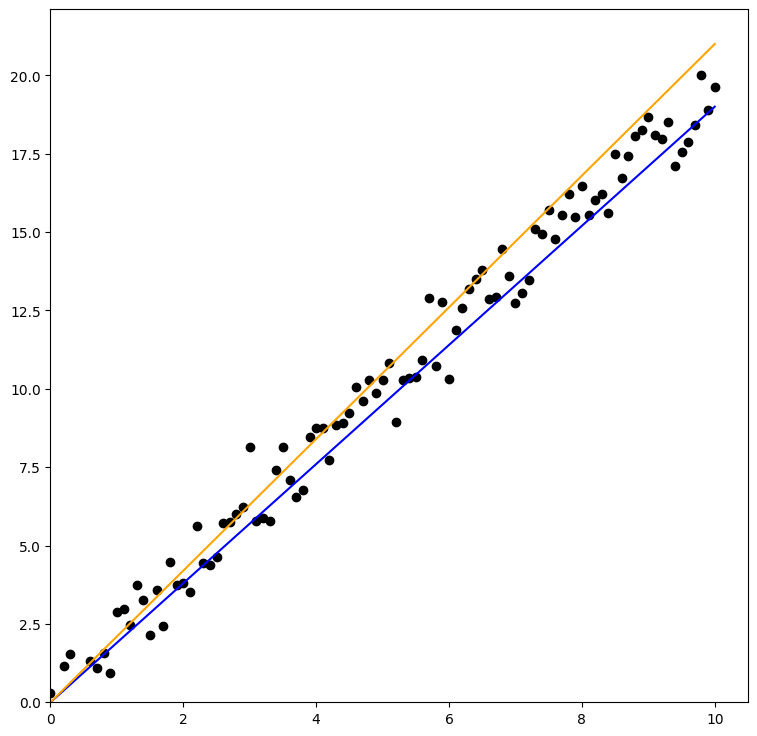

In [420]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.default_rng(seed=42)                         # set up randomness...
x = np.linspace(0.0, 10.0, num=101)
y = 2.0 * x + rng.normal(loc=0.0, scale=1.0, size=x.size)    # create data randomly y=2x+random

fig, ax = plt.subplots(figsize=(9, 9))
ax.scatter(x, y, c='black')

y1 = 1.9 * x   
y2 = 2.1 * x

# 2 possible models with alpha=1.9 (blue) and alpha=2.1 (orange)
ax.plot(x, y1, c='blue')
ax.plot(x, y2, c='orange')

ax.set_ylim(bottom=0)
ax.set_xlim(0)

* The method to identify the *best* value for $\alpha$ is the following
  * Define a loss function: $\textrm{loss}(\alpha)$ that uses the data
  * Find the (or one) minimum for this function
* The graph illustrates the loss value for different value of $\alpha$ 
  * $\textrm{loss}(\alpha) = \sum_{k=1}^{N} \left( y - \alpha x \right)^2$

(0.0, 2.55)

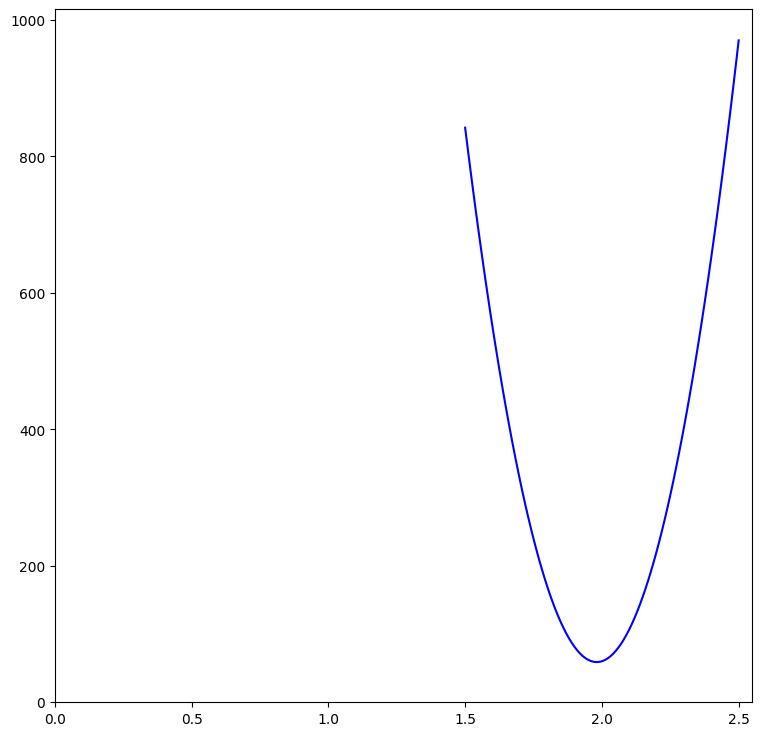

In [421]:
alpha = np.linspace(1.5, 2.5, num=101)
loss = [((y - a*x)**2).sum() for a in alpha]

fig, ax = plt.subplots(figsize=(9, 9))
ax.plot(alpha, loss, c='blue')
ax.set_ylim(bottom=0)
ax.set_xlim(0)

Here is the gradient descent algorithm:
* Given an interval $[a, b]$ where we will search $\alpha$
* Given a learning rate $\eta \in \mathbb{R}^{+}$ 
* Given a minimum variation $V \in \mathbb{R}{+}$
* Given a patience $P \in \mathbb{N}$ an integer
* Given a function $\textrm{loss}(\alpha)$
* Step 0: $\alpha_0 = \frac{b - a}{2}$
* Repeat the following: (k is the number of steps done)
  * compute $\delta_k = \textrm{loss'}(\alpha_k)$ the value of the first derivate of $\textrm{loss}$ at the point $\alpha_k$ (a.k.a. *gradient*)
  * compute $\alpha_{k+1} = \alpha_k - \eta * \delta_k$
  * compute loss variation $v_k = | \textrm{loss}(\alpha_k) - \textrm{loss}(\alpha_{k+1}) |$
  * if $v_k \geqslant V$ continue, except if $k = P$, in this case, stop
  * if $v_k < V$ stop

## Assignment
* Define a function `gradient` that receives 2 arguments 
  * `func` (callable) a function that takes ONE float argument and returns ONE float value
  * `x` (float) a number
  * `epsilon` (float) a small number (default = 0.001)
  * the return value is the gradient of function `func` at point `x`
  * it is given by the formula $\textrm{gradient}(\textrm{func}, x, \epsilon) = \frac{\textrm{func}(x+\epsilon) - \textrm{func}(x-\epsilon)}{2*\epsilon}$
* Re-define the class `Problem` using `dataclass`
  * Attributes
    * `x`, `y` are 2 numpy arrays (type hinting: `np.ndarray`)
    * `loss` a function with 3 arguments 
      * `x` and `y` numpy arrays
      * `alpha` float 
      * returns a float value (type hinting: `Callable[[np.ndarray, np.ndarray, float], float])`)
  * Method `fit`
    * Arguments:
      * `a`, `b` are 2 float numbers, this is the interval where we will search the best possible $\alpha$
      * `eta`, `V` are 2 float numbers: the learning rate and the minimum variation
      * `P` is an integer, it is the patience
    * Returns
      * one float value: the estimated BEST value for $\alpha$
    * Implements the gradient descent algorithm
    * Uses $\epsilon = 10^{-5}$ as precision for the computation of the gradient

## What you deliver
* function `gradient`
* class `Problem`, using `@dataclass`, with attributes having the correct name and correct type, with the method `fit`

## Grading

Lines refer to the line numbers within the cell "Self-Test". 

Question| Description | Self-test Lines | Points
---|---|---:|---:
Q3.1 | Function `gradient` is well-defined | x | 5
Q3.2 | Class `Problem` is well-defined | x-y | 15
**TOTAL** | | | **20**

In [117]:
# CodeGrade Tag Question3

# Write your solution in one single cell:
# function gradient
# class Problem

import numpy as np
from dataclasses import dataclass
from typing import Callable

def gradient(func: Callable[[float], float], x:float, epsilon :float = 0.001):
    return((func(x+epsilon)-func(x-epsilon))/(2*epsilon))


@dataclass
class Problem:
    x : np.ndarray
    y : np.ndarray
    loss: Callable[[np.ndarray, np.ndarray, float], float]
    
    def fit(self, a: float, b: float, eta: float, V: float, P: int) -> float:
        alpha_k = (b - a) / 2
        epsilon = 1e-5 
        for k in range(P):
            delta_k = gradient(lambda alpha: self.loss(self.x, self.y, alpha), alpha_k, epsilon)
            alpha_next = alpha_k - eta * delta_k
            v_k = abs(self.loss(self.x, self.y, alpha_k) - self.loss(self.x, self.y, alpha_next))
            if v_k < V:
                break  
            alpha_k = alpha_next
        return(alpha_k)

    # def fit(self, a: float, b: float, eta: float, V: float, P: int):
    #     alpha = (b-a)/2
    #     # a = self.loss(self.x, self.y, alpha) 
        
    #     k=2
    #     alpk = (b-a)/2
    #     dk=self.loss(self.x, self.y, alpk)
    #     alpk1 = alpk - eta*dk
    #     # end = self.loss(self.x, self.y, alpk1)
    #     # vk = abs(dk-end)
    #     vk = abs(self.loss(self.x, self.y, alpk)-self.loss(self.x, self.y, alpk1))
    #     alpk = alpk1
    #     while vk>=V and k != P:
    #     # while k<=10:
    #         dk=self.loss(self.x, self.y, alpk)
    #         alpk1 = alpk - eta*dk
    #         vk = abs(self.loss(self.x, self.y, alpk)-self.loss(self.x, self.y, alpk1))
    #         alpk = alpk1
    #         k += 1
    #     check = 0
    #     for i in range(len(self.x)):
    #         check += (self.y[i] - alpk1 * self.x[i])**2
    #     return(dk, alpk, alpk1, vk)





    def __hash__(self):
        return(timehash(self.time))


## Self-test

In [118]:
import math
from dataclasses import is_dataclass

import numpy as np

def double(x: float) -> float:
    return 2*x

def square(x: float) -> float:
    return 1.5*x**2 + 2.1*x - 10.2

assert math.isclose(gradient(func=double, x=1.0), 2.0)
assert math.isclose(gradient(func=square, x=1.0), 5.1)
assert math.isclose(gradient(func=square, x=-1.2, epsilon=0.1), -1.5)
assert math.isclose(gradient(func=math.exp, x=-1.2, epsilon=0.1), math.exp(-1.2), rel_tol=1e-2)
assert math.isclose(gradient(func=math.exp, x=-1.2, epsilon=1e-6), math.exp(-1.2))

if not is_dataclass(Problem):
    print("Not a dataclass.")

import numpy as np

rng = np.random.default_rng(seed=42)                        
data_x = np.linspace(0.0, 10.0, num=101)
data_y = 1.7 * data_x + rng.normal(loc=0.0, scale=1.0, size=data_x.size) 

def loss_mse(x: np.ndarray, y: np.ndarray, alpha: float) -> float:
    return float(((y - alpha * x)**2).sum())

prob = Problem(x=data_x, y=data_y, loss=loss_mse)
# print(prob.fit(a=1.0, b=2.0, eta=1e-5, V=1e-9, P=10000))
assert math.isclose(prob.fit(a=1.0, b=2.0, eta=1e-5, V=1e-9, P=10000), 1.681, abs_tol=1e-3)

print("✅ Self-Test OK")

✅ Self-Test OK
